In [1]:
!pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 16.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
────────────────────(E[HOSPITAL_DEATH|INSURANCE_Government,INSURANCE_Self Pay,
d[INSURANCE_Private]                                                          

                                                                   
INSURANCE_Medicare,TOTAL_ADMIT_DAYS,AGE,INSURANCE_Medicaid,GENDER])
                                                                   
Estimand assumption 1, Unconfoundedness: If U→{INSURANCE_Private} and U→HOSPITAL_DEATH then P(HOSPITAL_DEATH|INSURANCE_Private,INSURANCE_Government,INSURANCE_Self Pay,INSURANCE_Medicare,TOTAL_ADMIT_DAYS,AGE,INSURANCE_Medicaid,GENDER,U) = P(HOSPITAL_DEATH|INSURANCE_Private,INSURANCE_Government,INSURANCE_Self Pay,INSURANCE_Medicare,TOTAL_ADMIT_DAYS,AGE,INSURANCE_Medicaid,GENDER)

## Realized estimand

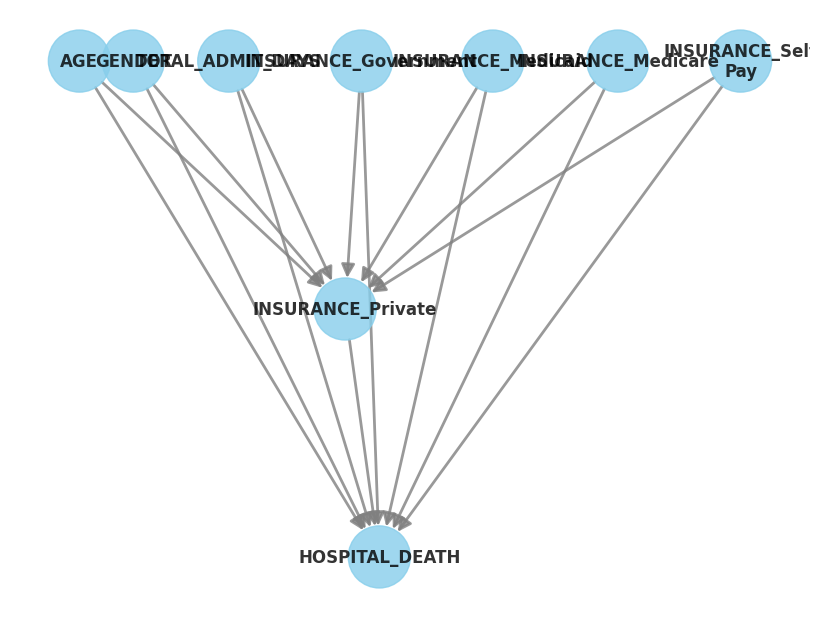

In [4]:
import pandas as pd
import dowhy
from dowhy import CausalModel

# Load the data
data = pd.read_csv('FinalAdmit.csv')

# One-hot encoding the 'INSURANCE' variable
data_encoded = pd.get_dummies(data, columns=['INSURANCE'])

# Assuming 'HOSPITAL_DEATH' is the outcome and 'INSURANCE_Private' as the treatment

treatment = 'INSURANCE_Private'
outcome = 'HOSPITAL_DEATH'
common_causes = ['AGE', 'GENDER', 'TOTAL_ADMIT_DAYS'] + [col for col in data_encoded.columns if 'INSURANCE_' in col and col != treatment]

# Define the causal model
model = CausalModel(
    data=data_encoded,
    treatment=treatment,
    outcome=outcome,
    common_causes=common_causes
)

# Identify the causal effect
identified_estimand = model.identify_effect()

# Estimate the causal effect using a simple method, like Linear Regression
causal_estimate = model.estimate_effect(identified_estimand,
                                        method_name="backdoor.linear_regression")

# Print the causal estimate
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

# Plot causal graph
model.view_model(layout="dot")
